In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
image_path = './data/test/ok/DOBRE_000186_top.jpg'

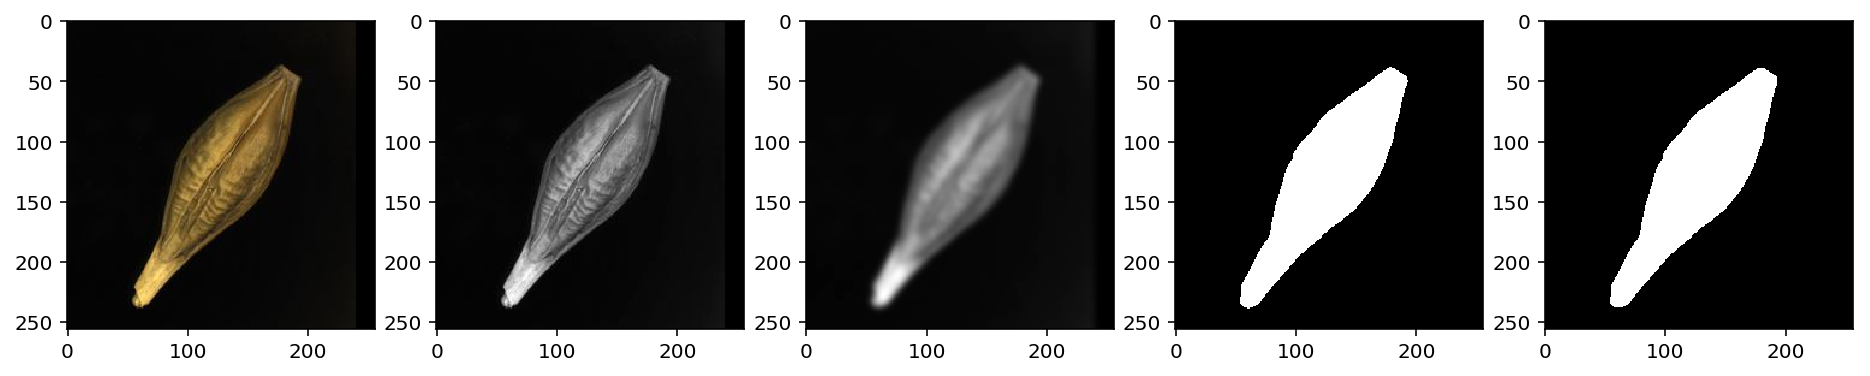

In [3]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (15, 15), 0)
_, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 5, 1), plt.imshow(image_rgb)
plt.subplot(1, 5, 2), plt.imshow(gray, 'gray')
plt.subplot(1, 5, 3), plt.imshow(blur, 'gray')
plt.subplot(1, 5, 4), plt.imshow(threshold, 'gray')
plt.subplot(1, 5, 5), plt.imshow(opening, 'gray')
plt.show()

In [4]:
_, contours, _ = cv2.findContours(opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# choose contour with the largest area
contours.sort(key=lambda c: cv2.contourArea(c))
cnt = contours[-1]

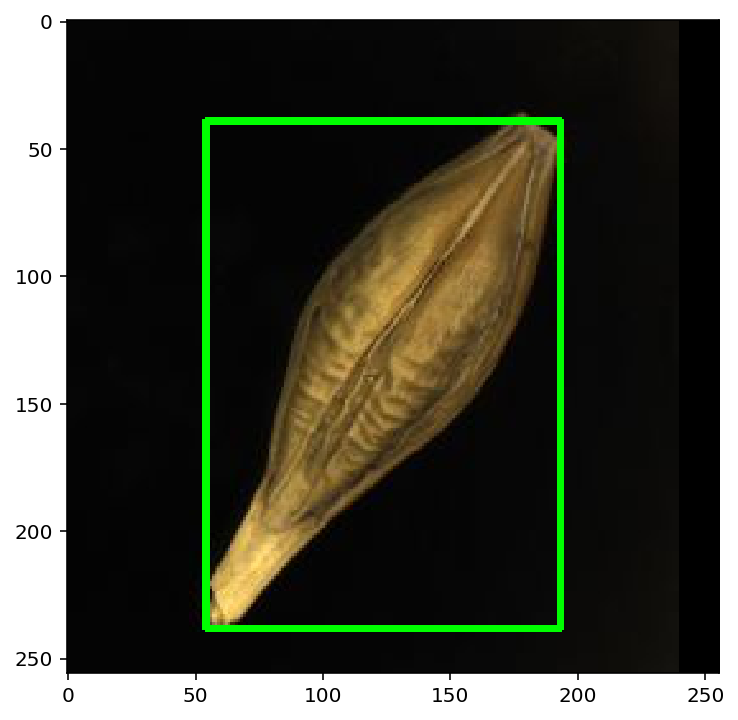

Width:  139px
Height: 199px


In [5]:
x, y, w, h = cv2.boundingRect(cnt)
img = image.copy()
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

print('Width:  {:.0f}px'.format(w))
print('Height: {:.0f}px'.format(h))

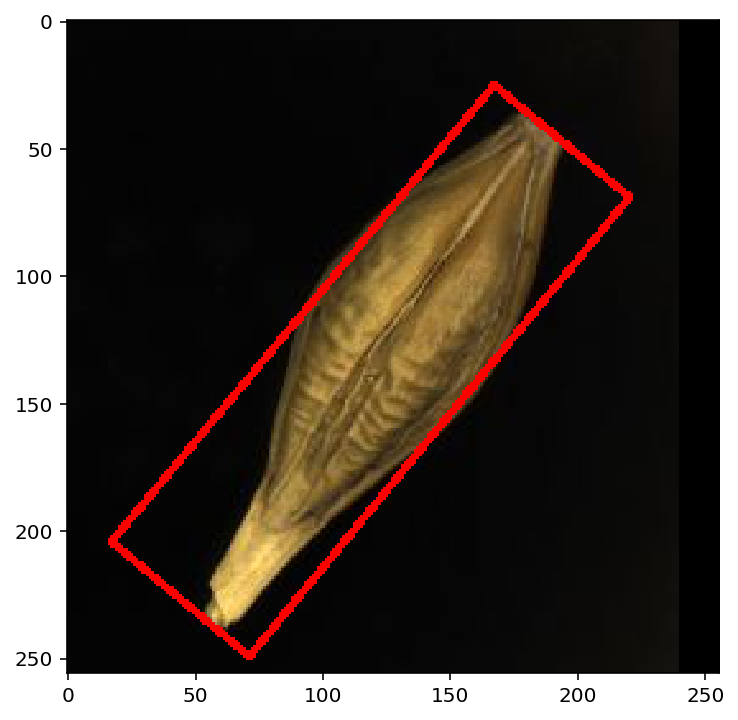

Width:  70px
Height: 233px


In [6]:
rect = cv2.minAreaRect(cnt)
_, size, _  = rect

box = cv2.boxPoints(rect)
box = np.int0(box)
img = image.copy()
cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

w = sorted(size)[0]
h = sorted(size)[1]

print('Width:  {:.0f}px'.format(w))
print('Height: {:.0f}px'.format(h))